# ERA5

[*ERA5*](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) is the fifth generation ECMWF (*European Centre for Medium-Range Weather Forecast*) atmospheric reanalysis of the global climate covering the period from January 1940 to present.

For our purposes, we are using a subset of ERA5 covering the region of 145°E - 145°W and 60°S - 15°N for 2 - 18 Feb 2023.

## Objectives

- Explore ERA5 as your first climate dataset
- Understand the file structure of a *NetCDF* file
- Understand the difference between *dimensions*, *coordinates*, and *variables*
- Understand how to select a variable and put it on a map

## Import libraries

for reading in data, for plotting, and for map projections.

In [1]:
# for plotting
import matplotlib.pyplot as plt

# for map projections
import cartopy.crs as ccrs

# xarray for NetCDF data
import xarray as xr

# pandas for CSV data
import pandas as pd

# setting this path so we have to type less
# PATH = "/nesi/nobackup/nesi99991/ASP_winterschool2023"
PATH = "../"

## Load cyclone track data

In [2]:
# Track data adapted from https://commons.wikimedia.org/wiki/File:Gabrielle_2023_path.png
df = pd.read_csv(PATH+"/data/gabrielle_track.csv",index_col=0).iloc[::4]
tc_lons = df["longitude"]
tc_lats = df["latitude"]
df.head()

,latitude,longitude
time,,
2023-02-04-12:00:00,-11.6,167.0
2023-02-05-12:00:00,-12.4,161.8
2023-02-06-12:00:00,-12.4,156.1
2023-02-07-12:00:00,-14.0,153.9
2023-02-08-12:00:00,-16.8,152.6


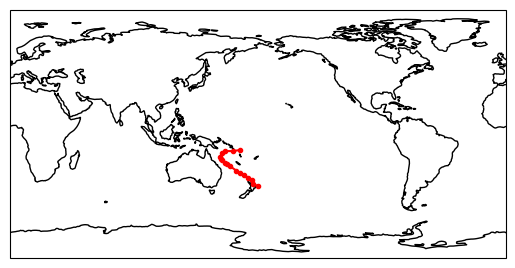

In [3]:
fig, ax = plt.subplots(1,1,subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)})
ax.coastlines()
ax.plot(tc_lons,tc_lats,'r.-',transform=ccrs.PlateCarree())
ax.set_global()

## Load ERA5 dataset

In [4]:
filename = '../data/era5.nc'
ds = xr.open_dataset(filename)

# get the info on the file to know what to select
ds # or display(ds)

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 408, longitude: 281, latitude: 301)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2023-02-02 ... 2023-02-18T23:00:00
  * longitude  (longitude) float32 1kB 145.0 145.2 145.5 ... 214.5 214.8 215.0
  * latitude   (latitude) float32 1kB 15.0 14.75 14.5 ... -59.5 -59.75 -60.0
Data variables:
    u10        (time, latitude, longitude) float64 276MB ...
    v10        (time, latitude, longitude) float64 276MB ...
    t2m        (time, latitude, longitude) float64 276MB ...
    msl        (time, latitude, longitude) float64 276MB ...
    ro         (time, latitude, longitude) float64 276MB ...
    sst        (time, latitude, longitude) float64 276MB ...
    tcc        (time, latitude, longitude) float64 276MB ...
    tclw       (time, latitude, longitude) float64 276MB ...
    tp         (time, latitude, longitude) float64 276MB ...
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Jul 29 01:21:08 2023: cdo -sellonlatbox,145,215,-60,15 ...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [5]:
ds.attrs["history"].split("\n")[0]

'Sat Jul 29 01:21:08 2023: cdo -sellonlatbox,145,215,-60,15 /Users/mariok/Downloads/adaptor.mars.internal-1690426612.7232573-28597-12-56e7f953-6609-4286-8ef0-8968206ee2a5.nc era5.nc'

## Overlay cyclone track on top of ERA5 data

2023-02-13T00:00:00.000000000


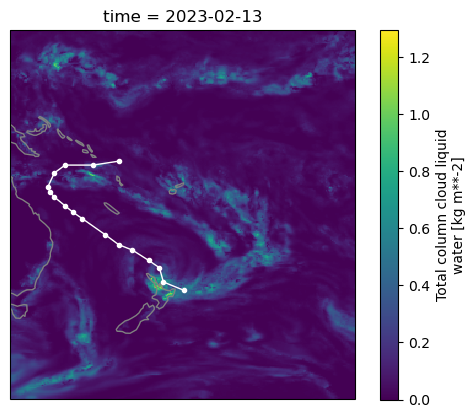

In [6]:
timestamp = ds.time[264].values
print(timestamp)
X = ds.tclw.sel(time=timestamp) #select one time step

# define the PlateCarree projection and center in the Pacific
proj = ccrs.PlateCarree(central_longitude=180)

fig, ax = plt.subplots(1,1,subplot_kw={"projection": proj})
ax.coastlines(color='grey')
X.plot(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude')
# add TC Gabrielle track
ax.plot(tc_lons,tc_lats,ls="-",lw=1,color="white",marker=".",transform=ccrs.PlateCarree())

**Exercises and questions**

1. Save the figure as a PNG file (`fig.savefig("good_unique_figure_name.png")`)
2. Create a map with sea-surface temperature and save the figure
3. Create a map of the with the standard deviation of the sea-level pressure (`.std(dim="time")`) and overlay the cyclone track. What do you see?
4. Create a map with wind speed ($s = \sqrt{u_{10m}^2 + v_{10m}^2}$)
5. Create a map in another projection
6. What's the difference between *dimensions*, *coordinates*, and *variables*

In [7]:
# print("Example solution for Exercise 3")
# proj = ccrs.PlateCarree(central_longitude=180)

# fig, ax = plt.subplots(1,1,subplot_kw={"projection": proj})
# ax.coastlines(color='grey')
# ds.msl.std(dim="time").plot(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree())
# ax.plot(tc_lons,tc_lats,'k.-',transform=ccrs.PlateCarree());